In [1]:
# Program    : Pemodelan Inversi untuk penentuan Episenter
# Spesifikasi: Inverse metode Grid Search
# Versi      : 1.0
# Last Edited: 2022-11-23
# Programmer : Sabda Wahidatulhusna

import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
import statistics
warnings.filterwarnings('ignore')

from numpy import nan

In [2]:
def graviti(Xi,Xc,Zc,R,rho):
    G = 6.674*(10**(-11))
    grav = (G*(4/3)*np.pi*(R**3)*rho*Zc)/(((Xi-Xc)**2+(Zc)**2)**(3/2))*10**5
    return grav
Xi = np.arange(0,2000,50) #titik survey
Xc = 1000
Zc = 350
R = 300
rho = 3000
dobs = np.zeros(len(Xi))
for i in range(len(Xi)):
    dobs[i] = graviti(Xi[i],Xc,Zc,R,rho)
    
#Tambahkan Noise
dobs = dobs + np.random.randn(len(dobs))*2


In [6]:
x = np.arange(0, 2000, 100)
y = np.arange(0, 2000, 100)
X, Y = np.meshgrid(x, y, sparse=True)
ndata = len(x)
Terr = []
for i in range(len(x)):
    for j in range(len(y)):
        e_total = 0
        for k in range(len(Xi)):
            dcal = graviti(Xi[k],x[i],y[j],R,rho)
            e = abs(dcal - dobs[k])
            Erms = np.sqrt((1/(len(dobs)))*(e)**2)
            e_total += Erms
        Terr.append(e_total)
# print(Terr)
Terr = np.array(Terr)
print(min(Terr[np.logical_not(np.isnan(Terr))]))
Terr1 = Terr.reshape(ndata,ndata)
Terr1 = Terr1.transpose()

e_value = np.argwhere(Terr1==Terr1[np.logical_not(np.isnan(Terr1))].min()).ravel()
xe_baru = x[e_value[1]]
ze_baru = y[e_value[0]]
print("Koordinat bola Baru:\n")
print(f'X = {xe_baru}\nY = {ze_baru}')
dcalnew = np.zeros(len(Xi))
for i in range(len(Xi)):
    dcalnew[i] = graviti(Xi[i],xe_baru,ze_baru,R,rho)

14.045100827498267
Koordinat bola Baru:

X = 1000
Y = 400


(1900.0, 0.0)

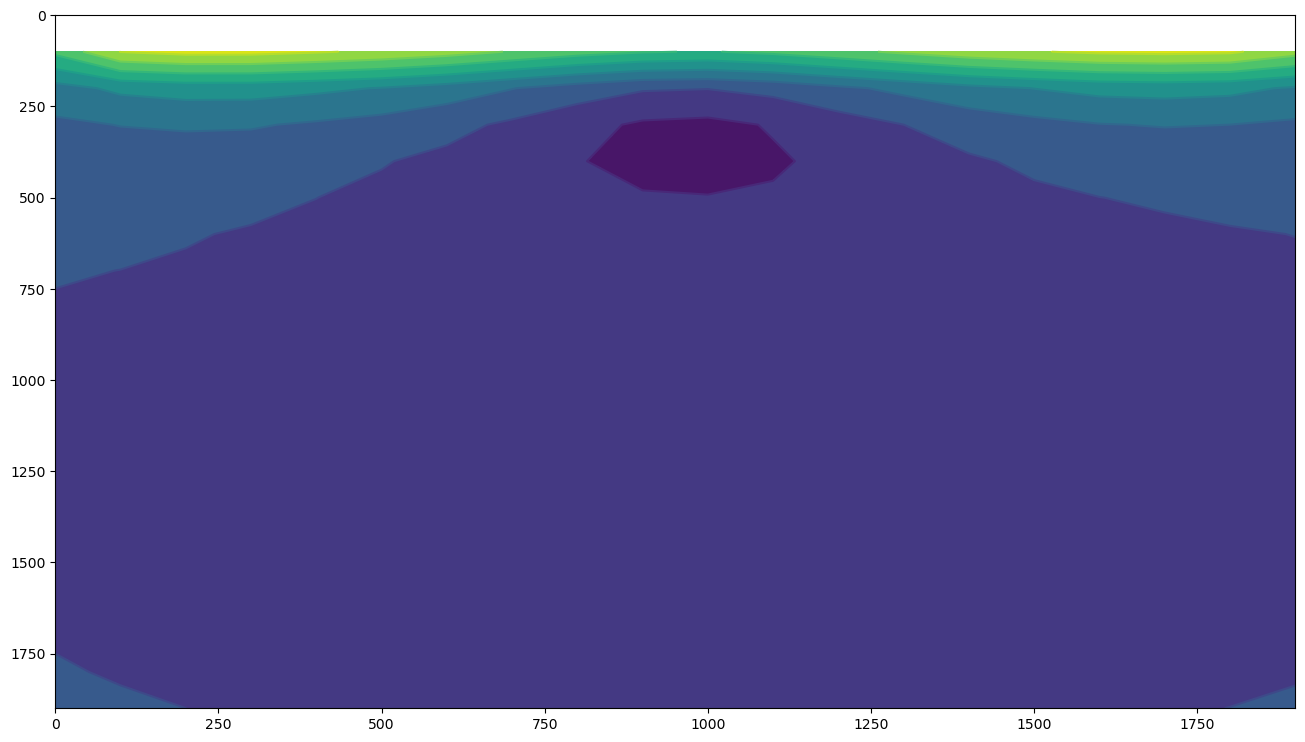

In [7]:
plt.figure(figsize=(16,9))
cs1=plt.contourf(x, y, Terr1,cmap=plt.cm.viridis)
cs2=plt.contour(x, y, Terr1,cmap=plt.cm.viridis)
# plt.clabel(cs2, fontsize=10)
plt.ylim(max(y), min(y))

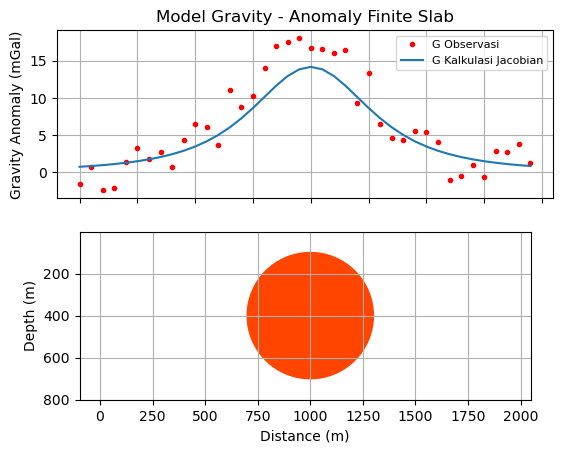

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(Xi, dobs, "r.", label='G Observasi')
ax1.plot(Xi, dcalnew, '-', label='G Kalkulasi Jacobian')
ax1.legend(loc=1, prop={'size': 8})
ax1.grid()
ax1.set_ylabel("Gravity Anomaly (mGal)")
ax1.set_title("Model Gravity - Anomaly Finite Slab")
# ax1.set_ylim(1000)
# ax1.set_xlim(2000)
circle1=plt.Circle((xe_baru,ze_baru), R, color="orangered")
ax2.set_aspect(1)
ax2.add_artist(circle1)
# # ax2.imshow(FS, aspect='auto', extent=[min(xo), max(xo), max(y), min(y)], cmap="Greys")
# ax2.imshow(FS2, aspect='auto', extent=[min(xo), max(xo), max(y), min(y)], cmap="Greys")
ax2.set_xlabel("Distance (m)")
ax2.set_ylabel("Depth (m)")
ax2.set_ylim(800)
# ax2.set_xlim(2000)
# ax2.set_xlim(980)
ax2.grid()
plt.show()